In [1]:
# %pip install scikit-learn
# %pip install keras
# %pip install tensorflow

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

2024-08-29 08:13:10.875968: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-29 08:13:11.082059: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-29 08:13:11.335900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 08:13:11.480569: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 08:13:11.524395: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-29 08:13:11.904222: I tensorflow/core/platform/cpu_feature_gu

In [2]:
df = load_breast_cancer(as_frame=True).frame
df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# Разделяем фичи и таргет
X = df.drop('target', axis=1)
y = df.target

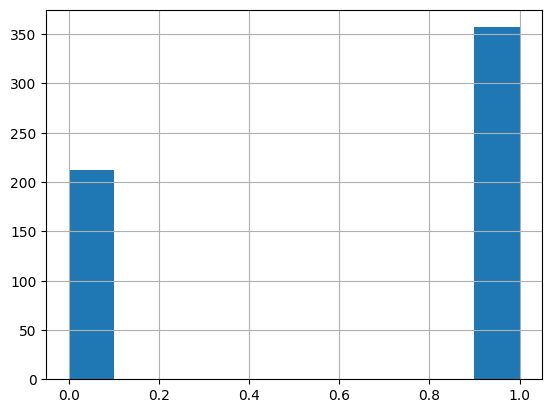

In [5]:
# Пациентов с раком больше, чтобы это учесть мы будем использовать stratify = y
y.hist();

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# Нормализуем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Это необходимо в текущей версии Keras
y_train, y_val = y_train.to_numpy(), y_val.to_numpy()

In [38]:
# Создаём функцию, возвращающую нейросеть

def create_model():
    model = Sequential() # Наша нейросеть из последовательности слоёв
    model.add(Input(shape=(X_train.shape[1],))) # Добавляем входной слой
    model.add(Dense(128, activation='relu'))    # Далее соответственно число нейронов и функция активации
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'precision']
                  )
    return model

In [39]:
from sklearn.utils import class_weight

# Получение весов классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [40]:
model = create_model() # Создаём нейросеть

# обучаем нейросеть
history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=40,   # число эпох
           batch_size=256, # параметр градиентного спуска
           class_weight = {0: class_weights[0], 1: class_weights[1]}
           )

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.5479 - loss: 0.6189 - precision: 0.8678 - val_accuracy: 0.7368 - val_loss: 0.5646 - val_precision: 0.9565
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7697 - loss: 0.5083 - precision: 0.9608 - val_accuracy: 0.8333 - val_loss: 0.4814 - val_precision: 0.9818
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8774 - loss: 0.4187 - precision: 0.9708 - val_accuracy: 0.8860 - val_loss: 0.4153 - val_precision: 0.9836
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9186 - loss: 0.3608 - precision: 0.9642 - val_accuracy: 0.8860 - val_loss: 0.3615 - val_precision: 0.9683
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9435 - loss: 0.3066 - precision: 0.9631 - val_accuracy: 0.8947 - val_loss: 0.3179 - val_precision: 0.9545
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9481 - loss: 0.2706 - precision: 0.9632 - val_accuracy: 0.9035 - val_loss: 0.2816 - val_pre

In [41]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'val_accuracy', 'val_loss', 'val_precision'])

In [42]:
# Получение значений лосса и валидационного лосса из истории
def check_metrics(history, figure_name):

    train = history.history[f'{figure_name}']
    val = history.history[f'val_{figure_name}']

    # Построение графика лосса и валидационного лосса
    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')
    plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
    plt.title(f'Training and Validation {figure_name}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{figure_name}')
    plt.legend()
    plt.show()

/tmp/ipykernel_636/1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


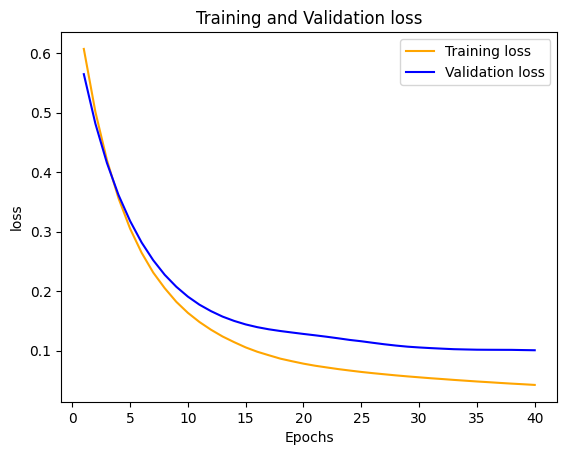

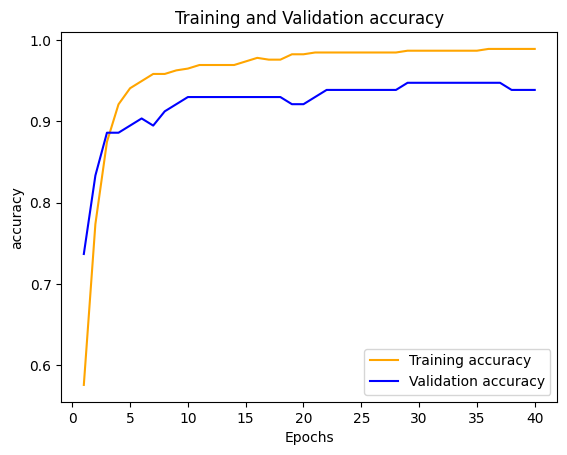

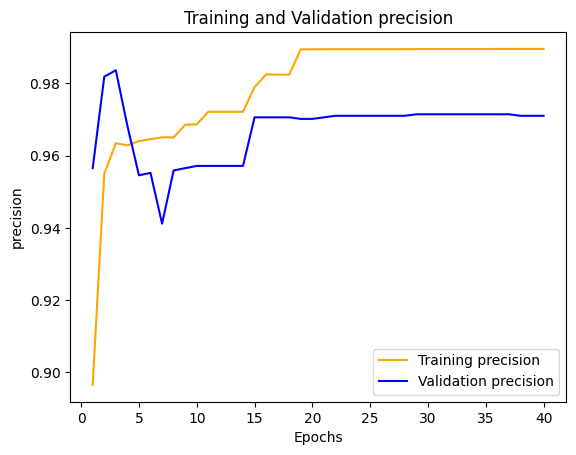

In [43]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')
check_metrics(history, 'precision')

In [13]:
from keras.layers import Dense, BatchNormalization, Dropout

In [44]:
# Использование BatchNormalization() в слоях
# Подробнее -- https://keras.io/api/layers/normalization_layers/batch_normalization/

def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [45]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=40,
           batch_size=256,
           class_weight={0:class_weights[0], 1:class_weights[1]})


Epoch 1/40


/home/timka999/Python projects/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.5800 - loss: 0.6954 - val_accuracy: 0.7982 - val_loss: 0.5609
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8613 - loss: 0.3907 - val_accuracy: 0.8860 - val_loss: 0.4938
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9321 - loss: 0.2529 - val_accuracy: 0.9211 - val_loss: 0.4423
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9468 - loss: 0.1972 - val_accuracy: 0.9298 - val_loss: 0.4019
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9518 - loss: 0.1655 - val_accuracy: 0.9298 - val_loss: 0.3704
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9673 - loss: 0.1339 - val_accuracy: 0.9298 - val_loss: 0.3450
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9772 - loss: 0.1115 - val_accuracy: 0.9298 - val_loss: 0.3242
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9707 - loss: 0.1080 - val_accuracy: 0.9386 - val_loss: 0.3070
Epoch 9/40

/tmp/ipykernel_636/1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


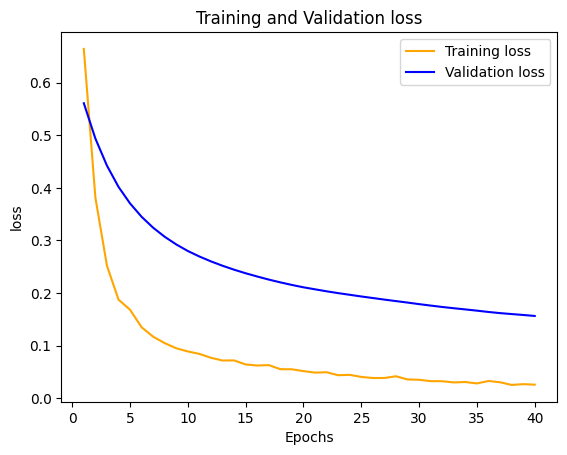

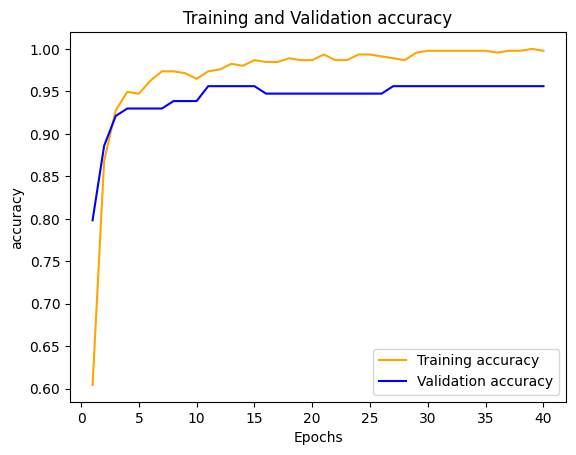

In [46]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [47]:
# Использование Dropout, зануление каждого нейрона с переданной вероятностью создаёт эффект ансамблирования и может помочь избежать оверфиттинга

def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [48]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=20,
           batch_size=256
        #    ,
        #    class_weight={0:class_weights[0],1:class_weights[1]}
           )

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step - accuracy: 0.3961 - loss: 1.1527 - val_accuracy: 0.5877 - val_loss: 0.6848
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5803 - loss: 0.7286 - val_accuracy: 0.7982 - val_loss: 0.5688
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7381 - loss: 0.5274 - val_accuracy: 0.9123 - val_loss: 0.4791
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8734 - loss: 0.3662 - val_accuracy: 0.9211 - val_loss: 0.4138
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9018 - loss: 0.2736 - val_accuracy: 0.9298 - val_loss: 0.3666
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9210 - loss: 0.2255 - val_accuracy: 0.9298 - val_loss: 0.3314
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9220 - loss: 0.1902 - val_accuracy: 0.9386 - val_loss: 0.3042
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9367 - loss: 0.1748 - val_accuracy: 0.9474 - val_loss: 0.2826

/tmp/ipykernel_636/1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


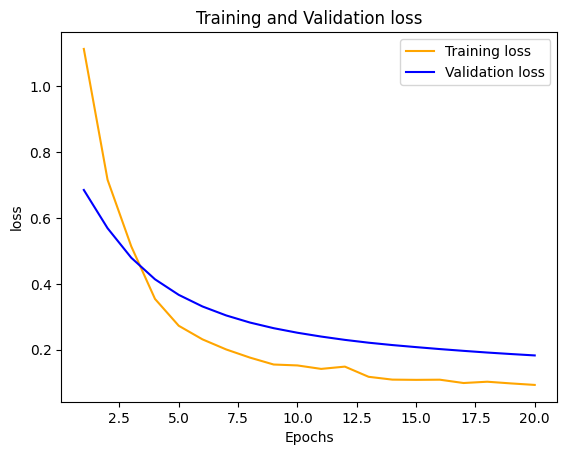

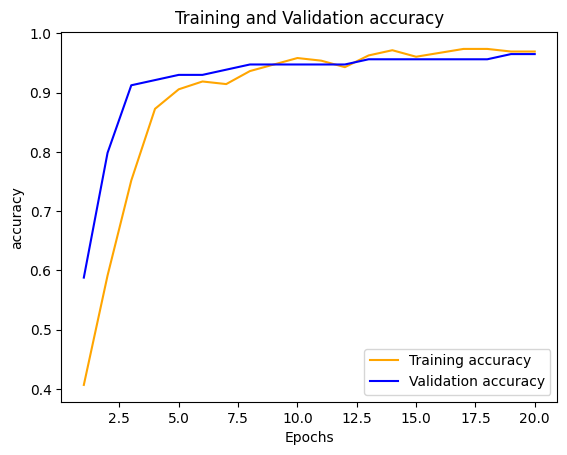

In [49]:
check_metrics(history, 'loss')
check_metrics(history, 'accuracy')

In [51]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [52]:
model.predict(X_val)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f4508369990> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[4.8390860e-03],
       [9.5333081e-01],
       [1.3183808e-01],
       [5.3892308e-01],
       [5.3953626e-03],
       [8.3945203e-01],
       [9.6000469e-01],
       [1.2833350e-02],
       [4.9967553e-02],
       [5.5699499e-04],
       [8.2015312e-01],
       [1.6727294e-01],
       [9.1368425e-01],
       [5.3630941e-02],
       [1.5006225e-01],
       [6.8529260e-01],
       [4.3097979e-01],
       [6.8117028e-01],
       [9.3781883e-01],
       [7.8105932e-01],
       [1.2501502e-01],
       [3.4694934e-01],
       [9.3809330e-01],
       [8.9056414e-01],
       [8.8095701e-01],
       [7.2867787e-01],
       [7.0787319e-03],
       [8.7896663e-01],
       [9.2071724e-01],
       [9.0699583e-01],
       [7.9870993e-01],
       [9.5959949e-01],
       [8.4775555e-01],
       [7.2809011e-01],
       [3.3824723e-02],
       [5.0743032e-01],
       [9.0622914e-01],
       [7.9816830e-01],
       [5.9547561e-01],
       [3.2600820e-02],
       [9.4208437e-01],
       [9.312674

In [53]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [54]:
# Итоговые метрики для валидационной выборки
print(classification_report(y_val, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [55]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [56]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )
    
    return model

In [26]:
# Остановка при отсутствии роста метрики accuracy у валидационной выборки

model = create_model()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
save_best_weights = ModelCheckpoint(filepath='./Some.weights.h5',
                                    save_weights_only=True,
                                    monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True)

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=100000,
           batch_size=256,
           class_weight={0:class_weights[0],1:class_weights[1]},
           callbacks=[early_stopping, save_best_weights])

Epoch 1/100000


/home/timka999/Python projects/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.6415 - loss: 0.7474 - val_accuracy: 0.8158 - val_loss: 0.5416
Epoch 2/100000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7925 - loss: 0.5671 - val_accuracy: 0.8947 - val_loss: 0.4420
Epoch 3/100000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9295 - loss: 0.4315 - val_accuracy: 0.9211 - val_loss: 0.3775
Epoch 4/100000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9448 - loss: 0.3475 - val_accuracy: 0.9211 - val_loss: 0.3321
Epoch 5/100000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9424 - loss: 0.3007 - val_accuracy: 0.9123 - val_loss: 0.2974
Epoch 6/100000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9507 - loss: 0.2510 - val_accuracy: 0.9123 - val_loss: 0.2691
Epoch 7/100000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9466 - loss: 0.2251 - val_accuracy: 0.9123 - val_loss: 0.2452
Epoch 8/100000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9534 - loss: 0.1961 - val_accuracy: 0.9211 -

In [27]:
model.load_weights("./Some.weights.h5")

In [28]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_val, y_pred)

0.9210526315789473